(157, 149, 3)

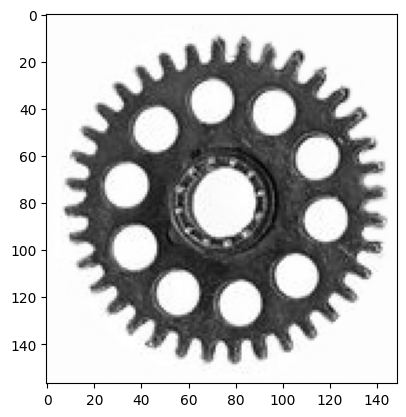

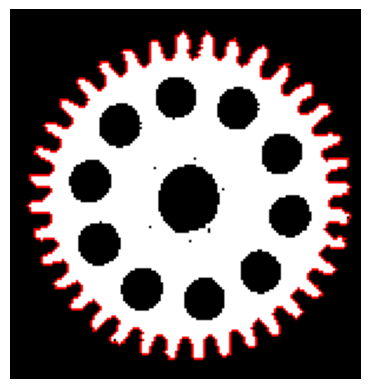

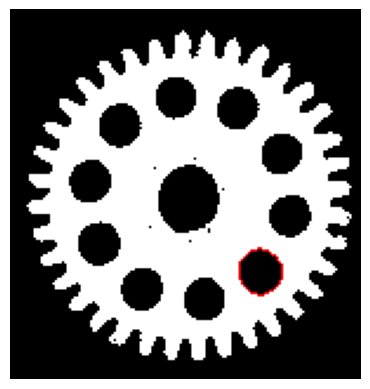

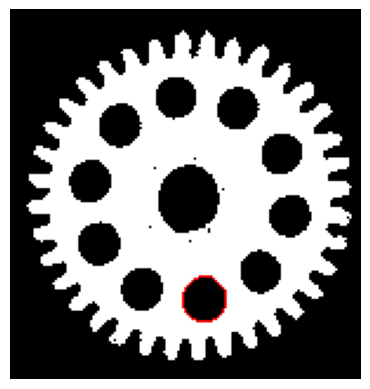

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

trybik = cv2.imread("trybik.jpg", 0)
plt.imshow(trybik, 'gray')
_, trybik_bin, = cv2.threshold(trybik, 220, 255, cv2.THRESH_BINARY_INV)
tr_contours, tr_hierarchy = cv2.findContours(trybik_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
trybik_contour1 = cv2.drawContours(cv2.cvtColor(trybik_bin, cv2.COLOR_GRAY2RGB), tr_contours, 0, (255,0,0))
plt.figure()
plt.imshow(trybik_contour1, 'gray')
plt.axis('off')
plt.figure()
plt.imshow(cv2.drawContours(cv2.cvtColor(trybik_bin, cv2.COLOR_GRAY2RGB), tr_contours, 4, (255,0,0)), 'gray')
plt.axis('off')
plt.figure()
plt.imshow(cv2.drawContours(cv2.cvtColor(trybik_bin, cv2.COLOR_GRAY2RGB), tr_contours, 2, (255,0,0)), 'gray')
plt.axis('off')
trybik_contour1.shape


In [2]:
sobelx = cv2.Sobel(trybik, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(trybik, cv2.CV_64F, 0, 1, ksize=5)

sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
sobel_magnitude /= np.amax(sobel_magnitude)
sobel_angles = np.arctan2(sobely, sobelx)

In [3]:
moments = cv2.moments(trybik_bin, 1)
center_x = int(moments["m10"] / moments["m00"])
center_y = int(moments["m01"] / moments["m00"])

print(center_x, center_y)

76 79


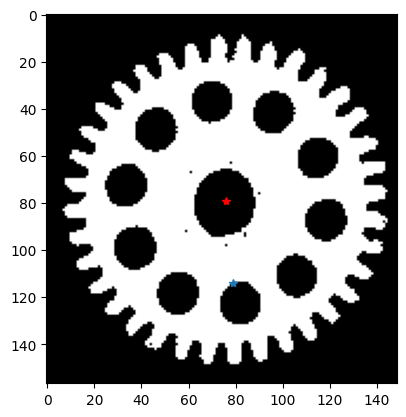

In [4]:
plt.imshow(trybik_bin, 'gray')
plt.plot(center_x, center_y, '*', color='red')
plt.plot(tr_contours[2][0][0][0], tr_contours[2][0][0][1], '*')

In [5]:
Rtable = [[] for _ in range(360)]
for contour_pt in tr_contours[0]:
    x, y = contour_pt[0]
    dist = np.sqrt((x-center_x)**2 + (y-center_y)**2)
    angle = np.arctan2(y - center_y, x - center_x)
    index = int(np.rad2deg(sobel_angles[y, x]))
    Rtable[index].append((dist, angle))

print(Rtable[30])

[(68.26419266350405, 1.4827889532671559), (59.033888572581766, 0.033885329904117606)]


In [6]:
trybiki2 = cv2.imread("trybiki2.jpg", 0)
_, trybiki2_bin, = cv2.threshold(trybiki2, 220, 255, cv2.THRESH_BINARY_INV)
tr_contours2, tr_hierarchy2 = cv2.findContours(
    trybiki2_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

moments2 = cv2.moments(trybiki2, 1)
center_x2 = int(moments2["m10"] / moments2["m00"])
center_y2 = int(moments2["m01"] / moments2["m00"])

sobelx2 = cv2.Sobel(trybiki2, cv2.CV_64F, 1, 0, ksize=5)
sobely2 = cv2.Sobel(trybiki2, cv2.CV_64F, 0, 1, ksize=5)
sobel_magnitude2 = np.sqrt(sobelx2**2 + sobely2**2)
sobel_magnitude2 /= np.amax(sobel_magnitude2)
sobel_angles2 = np.arctan2(sobely2, sobelx2)

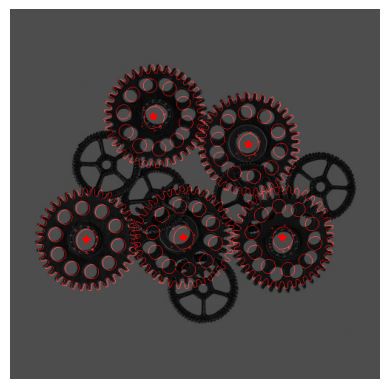

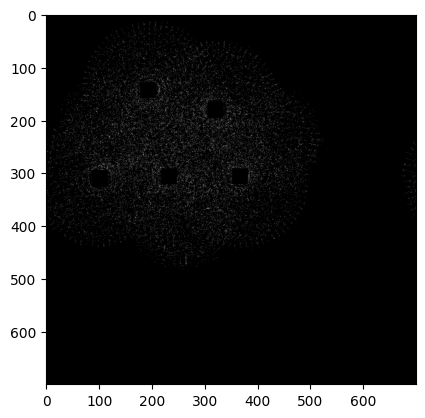

In [9]:
size = 700
hough_space = np.zeros((size, size))
n_rows, n_cols = sobel_magnitude2.shape
for y in range(n_rows):
    for x in range(n_cols):
        if sobel_magnitude2[y, x] > 0.5:
            index = int(np.rad2deg(sobel_angles2[y, x]))
            index = (index + 360) % 360
            if not Rtable[index]:
                continue

            for r, fi in Rtable[index]:
                x1 = -r * np.cos(fi) + x
                y1 = -r * np.sin(fi) + y
                hough_space[int(y1), int(x1)] += 1

centers_x = []
centers_y = []
neighborhood = 15
for i in range(5):
    m_y, m_x = np.where(hough_space.max() == hough_space)
    centers_x.append(m_x[0])
    centers_y.append(m_y[0])
    hough_space[m_y[0]-neighborhood:m_y[0]+neighborhood,
                m_x[0]-neighborhood:m_x[0]+neighborhood] = 0

contour = cv2.drawContours(np.zeros((trybik.shape[0], trybik.shape[1], 3)), tr_contours, -1, (255, 0, 0), 1).astype(np.uint8)
plt.imshow(trybiki2, 'gray')
contour2 = np.zeros((trybiki2.shape[0], trybiki2.shape[1], 3)).astype(np.uint8)
for x, y in zip(centers_x, centers_y):
    left = x - trybik.shape[1] // 2
    top = y - trybik.shape[0] // 2
    contour2[top:top+trybik.shape[0], left:left+trybik.shape[1]] += contour

plt.imshow(contour2, alpha=0.7)
plt.plot([centers_x], [centers_y], '*', color='r')
plt.axis('off')
plt.show()

plt.imshow(hough_space, cmap="gray")
plt.show()